# ECE-221710405015-M.Karthik

In [1]:
import os
import zipfile
local_zip='C:/Users/karthik/desktop/AI and ML/assignments/cats_and_dogs_filtered.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('C:/Users/karthik/desktop/AI and ML/assignments')
zip_ref.close()

In [2]:
os.listdir('C:/Users/karthik/desktop/AI and ML/assignments/cats_and_dogs_filtered')

['train', 'validation', 'vectorize.py']

In [3]:
os.listdir('C:/Users/karthik/desktop/AI and ML/assignments/cats_and_dogs_filtered/train')

['cats', 'dogs']

In [4]:
print(len(os.listdir('C:/Users/karthik/desktop/AI and ML/assignments/cats_and_dogs_filtered/train/dogs')))
print(len(os.listdir('C:/Users/karthik/desktop/AI and ML/assignments/cats_and_dogs_filtered/train/cats')))

1000
1000


In [5]:
base_dir='C:/Users/karthik/desktop/AI and ML/assignments/cats_and_dogs_filtered'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')

train_dogs_dir=os.path.join(train_dir,'dogs')
train_cats_dir=os.path.join(train_dir,'cats')

val_dogs_dir=os.path.join(validation_dir,'dogs')
val_cats_dir=os.path.join(validation_dir,'cats')

In [6]:
train_cats_filenames=os.listdir(train_cats_dir)
train_cats_filenames[:4]

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg']

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

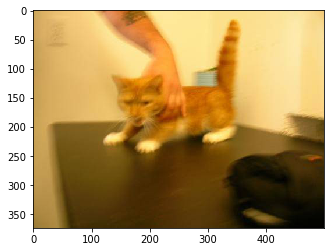

In [8]:
plt.imshow(plt.imread(os.path.join(train_cats_dir,train_cats_filenames[0])))

In [9]:
import random

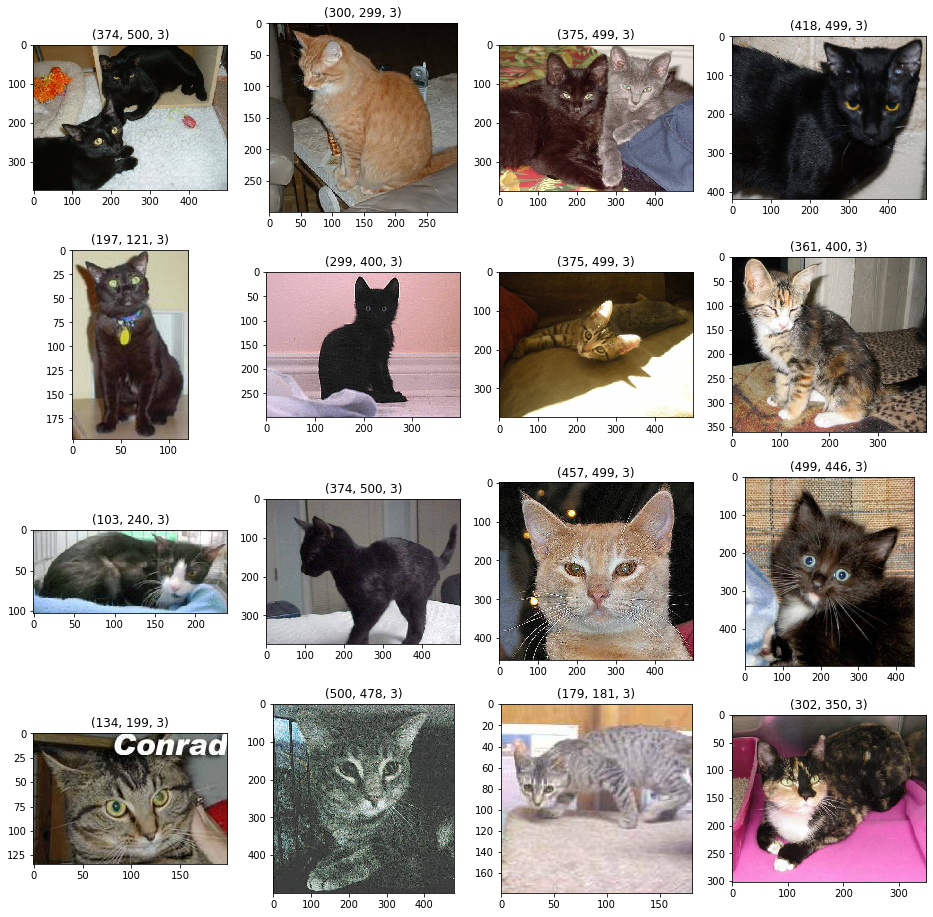

In [10]:
images=[]
plt.figure(figsize=(16,16))
for i in range(16):
  plt.subplot(4,4,i+1)
  imgname=random.choice(train_cats_filenames)
  images.append(imgname)
  img=plt.imread(os.path.join(train_cats_dir,imgname))
  plt.imshow(img)
  plt.title(img.shape)

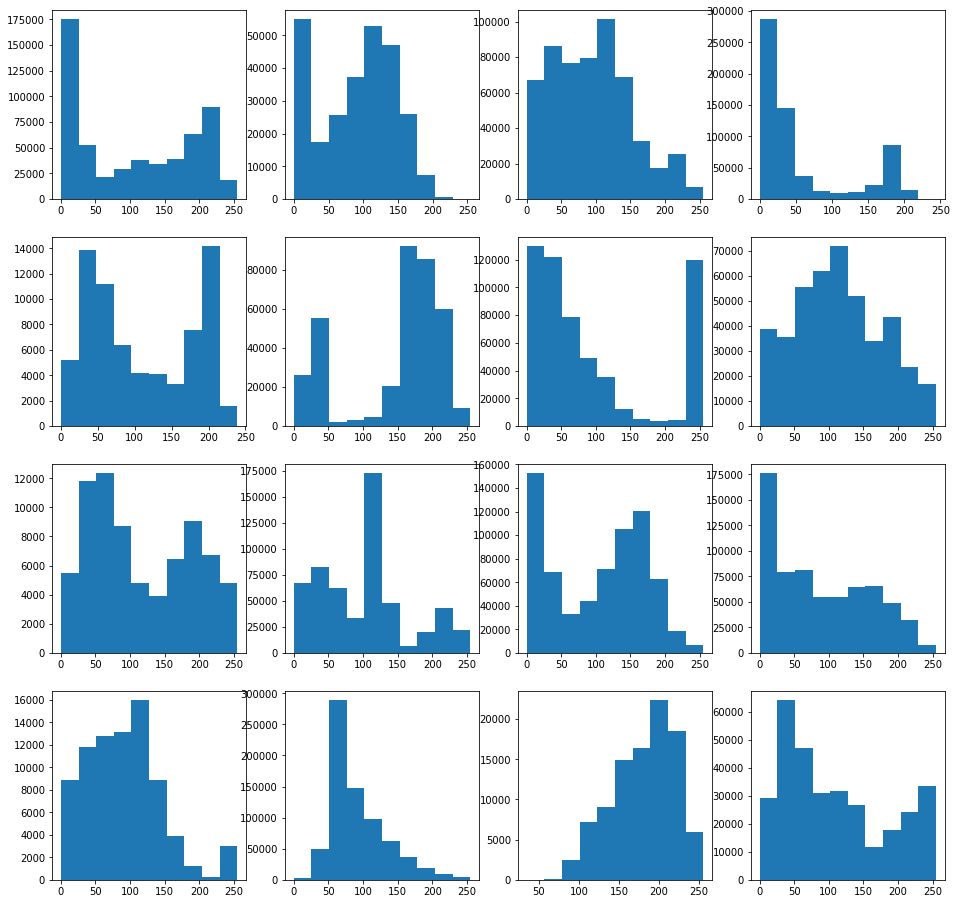

In [11]:
plt.figure(figsize=(16,16))
j=1
for i in images:
  img=plt.imread(os.path.join(train_cats_dir,i))
  plt.subplot(4,4,j)
  plt.hist(img.flat)
  j+=1

In [12]:
train_dogs_filenames=os.listdir(train_dogs_dir)
train_dogs_filenames[:4]

['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg']

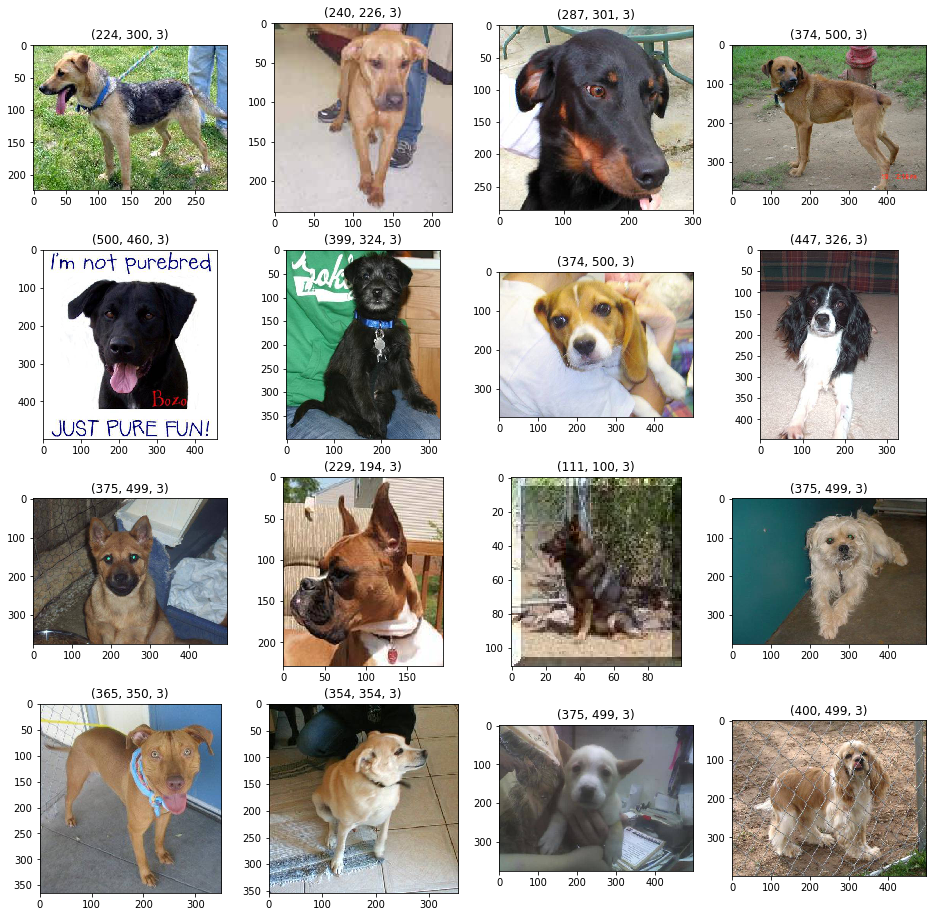

In [13]:
dogs_images=[]
plt.figure(figsize=(16,16))
for i in range(16):
  plt.subplot(4,4,i+1)
  imgname=random.choice(train_dogs_filenames)
  dogs_images.append(imgname)
  img=plt.imread(os.path.join(train_dogs_dir,imgname))
  plt.imshow(img)
  plt.title(img.shape)

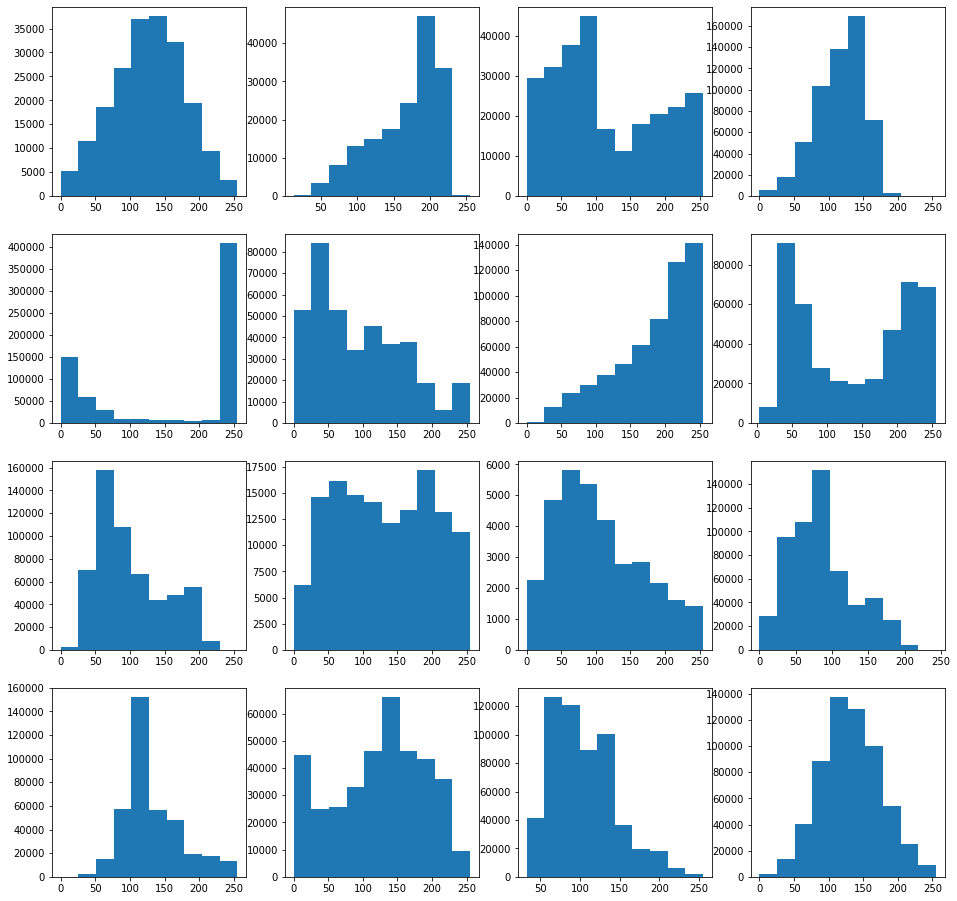

In [14]:
plt.figure(figsize=(16,16))
j=1
for i in dogs_images:
  img=plt.imread(os.path.join(train_dogs_dir,i))
  plt.subplot(4,4,j)
  plt.hist(img.flat)
  j+=1

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

validation_generator = val_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
img,labels=train_generator.next()
print(img.shape)
print(labels.shape)

(20, 150, 150, 3)
(20,)


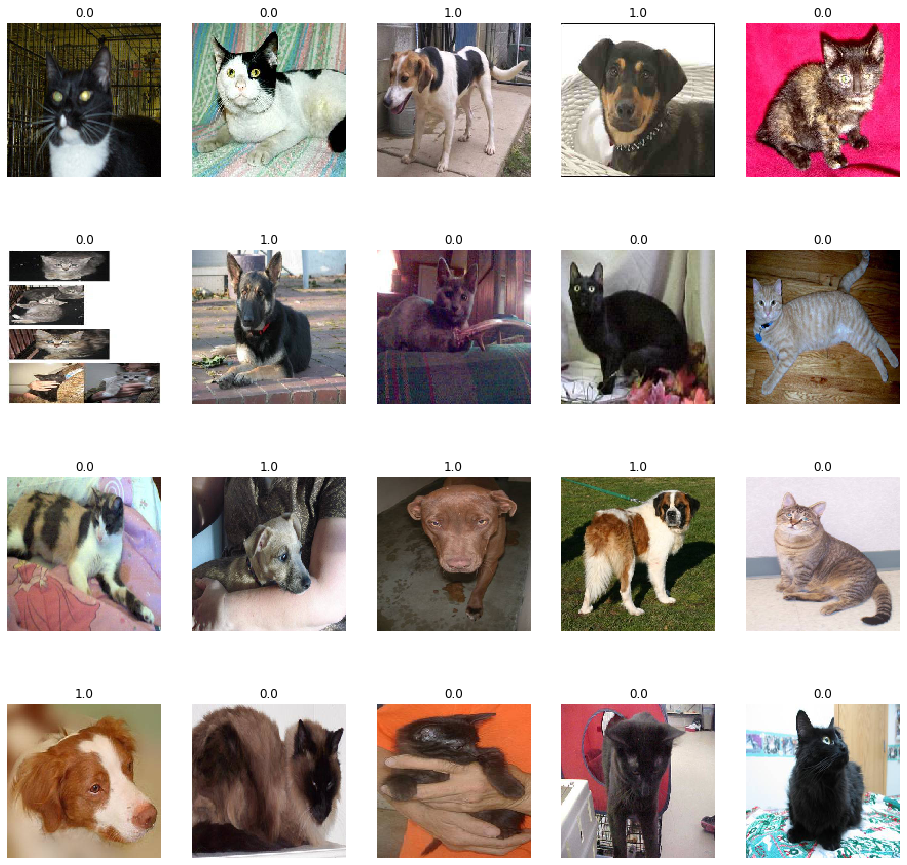

In [17]:
plt.figure(figsize=(16,16))
for i in range(20):
  plt.subplot(4,5,i+1)
  plt.imshow(img[i,:,:,:])
  plt.title(labels[i])
  plt.axis("off")

In [18]:
## import required methods
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D

In [19]:
model = Sequential()
## add a conv layer followed by maxpooling
model.add(Conv2D(16,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model.add(Conv2D(32,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model.add(Conv2D(64,3,activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D(2))
# Convert the featuremap into 1D  array
model.add(Flatten())
# Fully connected layer with 512 neurons
model.add(Dense(512,activation='relu'))
## Final output layer
model.add(Dense(1,activation='sigmoid'))

#let us see the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [20]:
### Compiling the model
import tensorflow as tf

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [21]:
history=model.fit(train_generator,epochs=15,validation_data=validation_generator,batch_size=32)

Epoch 1/15
100/100 [==============================] - 42s 419ms/step - loss: 0.7592 - accuracy: 0.5770 - val_loss: 0.6355 - val_accuracy: 0.6480
Epoch 2/15
100/100 [==============================] - 46s 465ms/step - loss: 0.5967 - accuracy: 0.6815 - val_loss: 0.6113 - val_accuracy: 0.6640
Epoch 3/15
100/100 [==============================] - 41s 411ms/step - loss: 0.5148 - accuracy: 0.7515 - val_loss: 0.6738 - val_accuracy: 0.6530
Epoch 4/15
100/100 [==============================] - 43s 426ms/step - loss: 0.4458 - accuracy: 0.7870 - val_loss: 0.6082 - val_accuracy: 0.6980
Epoch 5/15
100/100 [==============================] - 80s 800ms/step - loss: 0.3552 - accuracy: 0.8410 - val_loss: 0.6683 - val_accuracy: 0.7090
Epoch 6/15
100/100 [==============================] - 49s 487ms/step - loss: 0.2724 - accuracy: 0.8830 - val_loss: 0.7940 - val_accuracy: 0.6950
Epoch 7/15
100/100 [==============================] - 41s 411ms/step - loss: 0.1854 - accuracy: 0.9225 - val_loss: 0.8355 - val_ac

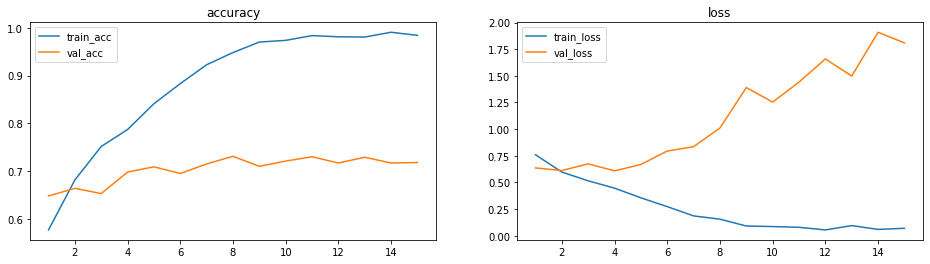

In [22]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = list(range(1,16))
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.title('loss')
plt.legend()

# With another model

In [23]:
model1 = Sequential()
## add a conv layer followed by maxpooling
model1.add(Conv2D(128,3,activation='relu',input_shape=(150,150,3)))
model1.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model1.add(Conv2D(64,3,activation='relu',input_shape=(150,150,3)))
model1.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model1.add(Conv2D(64,3,activation='relu',input_shape=(150,150,3)))
model1.add(MaxPooling2D(2))
## add a conv layer followed by maxpooling
model1.add(Conv2D(32,3,activation='relu',input_shape=(150,150,3)))
model1.add(MaxPooling2D(2))
# Convert the featuremap into 1D  array
model1.add(Flatten())
# Fully connected layer with 512 neurons
model1.add(Dense(512,activation='relu'))
## Final output layer
model1.add(Dense(1,activation='softmax'))

#let us see the summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [24]:
model1.compile(loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [25]:
history1=model.fit(train_generator,epochs=7,validation_data=validation_generator,batch_size=32)

Epoch 1/7
100/100 [==============================] - 41s 406ms/step - loss: 0.0297 - accuracy: 0.9905 - val_loss: 1.8608 - val_accuracy: 0.7020
Epoch 2/7
100/100 [==============================] - 40s 403ms/step - loss: 0.0403 - accuracy: 0.9880 - val_loss: 1.8928 - val_accuracy: 0.7080
Epoch 3/7
100/100 [==============================] - 45s 449ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 2.2165 - val_accuracy: 0.7320
Epoch 4/7
100/100 [==============================] - 47s 467ms/step - loss: 0.0367 - accuracy: 0.9925 - val_loss: 2.3156 - val_accuracy: 0.7260
Epoch 5/7
100/100 [==============================] - 43s 431ms/step - loss: 0.0475 - accuracy: 0.9905 - val_loss: 2.5142 - val_accuracy: 0.7160
Epoch 6/7
100/100 [==============================] - 41s 409ms/step - loss: 0.0047 - accuracy: 0.9990 - val_loss: 4.4509 - val_accuracy: 0.6700
Epoch 7/7
100/100 [==============================] - 42s 423ms/step - loss: 0.0451 - accuracy: 0.9915 - val_loss: 2.6488 - val_accuracy:

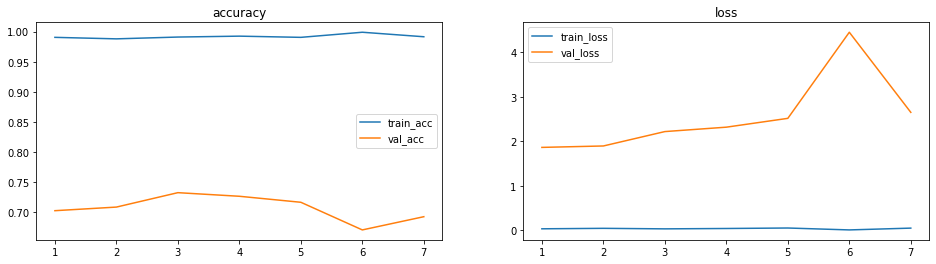

In [26]:
train_acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
train_loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = list(range(1,8))
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.plot(epochs,train_acc,label='train_acc')
plt.plot(epochs,val_acc,label='val_acc')
plt.title('accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs,train_loss,label='train_loss')
plt.plot(epochs,val_loss,label='val_loss')
plt.title('loss')
plt.legend()